## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [39]:
#import numpy, pandas libraries 
#Q: should i discriminate between numpy and pandas?
import numpy as np
import pandas as pd

#read file as a dataframe and display data info
office_df = pd.read_csv("datasets/office_episodes.csv")
office_df.head() #pd.DataFrame.head(office_df)
# office_df.info()


,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [40]:
top_view = office_df["viewership_mil"].max() #compared to max
top_episode = office_df["viewership_mil"].idxmax() #compared to list.index() )
top_stars = office_df["guest_stars"][top_episode]
top_star = "Cloris Leachman"
print(top_episode,top_view,top_stars) 

#try to print with labels
# The top episode is Episode
# It has million views
# It guest stars 


77 22.91 Cloris Leachman, Jack Black, Jessica Alba


In [41]:
#filter guest and allocate size
#.has_guests: True/False column for whether the episode contained guest stars.episodes with guest appearances have a marker size of 250 and episodes without are sized 25
s_hasGuests = [(office_df["has_guests"]*225)+25]
print(type(s_hasGuests))
print(s_hasGuests)

#merge with df
#office_df["has_guests_size"] = [(office_df["has_guests"]*225)+25]
#office_df["has_guests_size"] = s_hasGuests

<class 'list'>
[0       25
1       25
2       25
3       25
4       25
      ... 
183     25
184     25
185    250
186     25
187    250
Name: has_guests, Length: 188, dtype: int64]


In [42]:
#filter rating and allocate colour
rating_col =[]
for ind, row in office_df.iterrows():
    if row["scaled_ratings"] < 0.25:
        rating_col.append('red')
    elif row["scaled_ratings"] < 0.50:
        rating_col.append('orange')
    elif row ["scaled_ratings"] < 0.75:
        rating_col.append('lightgreen')
    else:
        rating_col.append('darkgreen')
print(type(rating_col))
print(rating_col[:10])

<class 'list'>
['orange', 'lightgreen', 'orange', 'orange', 'lightgreen', 'orange', 'lightgreen', 'orange', 'lightgreen', 'lightgreen']


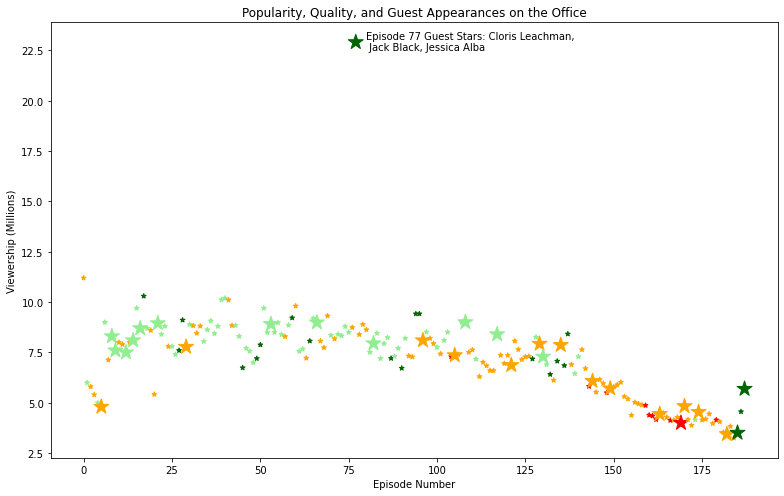

In [43]:
#import matplotlib modules
import matplotlib.pyplot as plt
#initalize a matplotlib.pyplot fig object
plt.rcParams['figure.figsize'] = [11, 7]
fig = plt.figure() 

#plotting:
# Hanging indents should add a level.
plt.scatter(
    x = office_df["episode_number"] ,
    y = office_df["viewership_mil"], #viewship already in million
    s = s_hasGuests,
    c = rating_col,
    marker = "*"
)

# formatting:
plt.xlabel("Episode Number")
# plt.xticks
plt.ylabel("Viewership (Millions)")
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.text(80,22.5, "Episode 77 Guest Stars: Cloris Leachman, \n Jack Black, Jessica Alba")
#plt.text(80,22.5, "Episode 77 Guest Stars:" + top_stars)
plt.show()

__Projects 1170__

Use the following dataset: datasets/office_episodes.csv, which was downloaded from Kaggle.This dataset contains information on a variety of characteristics of each episode. In detail, these are:

datasets/office_episodes.csv
* episode_number: Canonical episode number.
* season: Season in which the episode appeared.
* episode_title: Title of the episode.
* description: Description of the episode.
* ratings: Average IMDB rating.
* votes: Number of votes.
* viewership_mil: Number of US viewers in millions.
* duration: Duration in number of minutes.
* release_date: Airdate.
* guest_stars: Guest stars in the episode (if any).
* director: Director of the episode.
* writers: Writers of the episode.
* has_guests: True/False column for whether the episode contained guest stars.
* scaled_ratings: The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).

Create a matplotlib scatter plot of the data that contains the following attributes:
* Each episode's episode number plotted along the x-axis - __(Done)__
* Each episode's viewership (in millions) plotted along the y-axis - __(Done)__
* A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:__(Done)__
  * Ratings < 0.25 are colored "red"
  * Ratings >= 0.25 and < 0.50 are colored "orange"
  * Ratings >= 0.50 and < 0.75 are colored "lightgreen"
  * Ratings >= 0.75 are colored "darkgreen"
* A sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25
* A title, reading "Popularity, Quality, and Guest Appearances on the Office" - __(Done)__
* An x-axis label reading "Episode Number" - __(Done)__
* A y-axis label reading "Viewership (Millions)" - __(Done)__
* Provide the name of one of the guest stars (hint, there were multiple!) who was in the most watched Office episode. Save it as a string in the variable top_star (e.g. top_star = "Will Ferrell"). - __(Done)__

Note:
* initalize a matplotlib.pyplot fig object, which you can do using the code fig = plt.figure() (provided you have imported matplotlib.pyplot as plt) - (Done)- __(Done)__ding the type, data, labels, etc) in the same cell as the one you initialize your figure (fig) - __(Done)__
* set the figure size parameters using this code (provided again you have imported matplotlib.pyplot as plt): plt.rcParams['figure.figsize'] = [11, 7] - __(Done)__
* Bonus Step: try to differentiate guest appearances not just with size, but also with a star (use a different marker.)! __(Done)__